# Model development 

## Questions 
- Do I know if the dealer is offereing fair value for my trade-in?
- Do I know if I put a fair value on my car? 

In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [136]:
# import data 
pathfile = r'C:\Users\QXJ\Desktop\IBM\Analysis data with python\automobile_clean.csv'
df = pd.read_csv(pathfile, index_col = 0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,highway-L/100km,Norm_height,horsepower-binned,fuel-type-diesel,gas-type-diesel,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495,8.703704,0.816054,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500,8.703704,0.816054,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500,9.038462,0.876254,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950,7.833333,0.908027,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450,10.681818,0.908027,Low,0,1,1,0


## Linear Regression and Multiple Linear Regression

#### If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer: Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lm = LinearRegression()
lm

LinearRegression()

In [142]:
# highway-mpg vs price linear regression formula
X = df[['highway-mpg']]
Y = df['price']
print(lm.fit(X,Y))

LinearRegression()


In [144]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [145]:
lm.intercept_

38423.305858157386

In [146]:
lm.coef_

array([-821.73337832])

In [147]:
# Linear regression formula
print("Price = " + str(-821.73337832) + " * Highway-mpg + " +str(38423.30585816) )

Price = -821.73337832 * Highway-mpg + 38423.30585816


In [148]:
# engine-size vs. price
lm1 = LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
lm1

LinearRegression()

In [149]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281049
[166.86001569]


In [150]:
print("Price = " + str(166.86001569)+" * engine-size "+str(-7963.338906281049))

Price = 166.86001569 * engine-size -7963.338906281049


In [159]:
# Hoursepower, Curb-weight, Engine-size, Highway-mpg vs. Price
Z = df[['horsepower', 'curb-weight','engine-size','highway-mpg']]
lm.fit(Z,df['price'])
lm

LinearRegression()

In [160]:
print(lm.intercept_)
print(lm.coef_)

-15811.863767729232
[53.53022809  4.70805253 81.51280006 36.1593925 ]


In [161]:
print("Price = " + str(-15811.863767729232)+"  +horsepower *"+str(53.53022809)+" + curb-weight * "+str(4.70805253)+" + engine-size *"+str(81.51280006)+" + highweight-mpg *"+str(36.1593925))

Price = -15811.863767729232  +horsepower *53.53022809 + curb-weight * 4.70805253 + engine-size *81.51280006 + highweight-mpg *36.1593925


In [162]:
# normalized-losses and highway-mpg vs price 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df['price'])
lm2

LinearRegression()

In [163]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [164]:
lm2.intercept_

38201.31327245728

In [156]:
print('Price = '+'normalized_losses * '+str(1.49789586)+' + highway-mpg * '+ str(-820.45434016) +' + '+str(38201.31327245728))

Price = normalized_losses * 1.49789586 + highway-mpg * -820.45434016 + 38201.31327245728


## Model Evaluation Using Visualization

###  To visulize th fit of linear regression: Regression plot and residual plot

(0.0, 48175.849001514434)

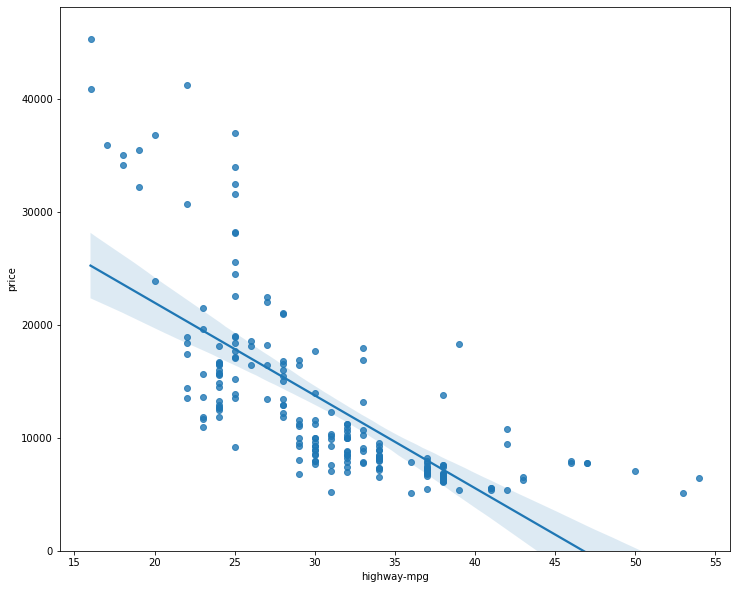

In [165]:
# highway-mpg vs. price
plt.figure(figsize = (12,10))
sns.regplot(x='highway-mpg', y='price',data=df)
plt.ylim(0,)
# y-axis from 0 

(0.0, 47414.1)

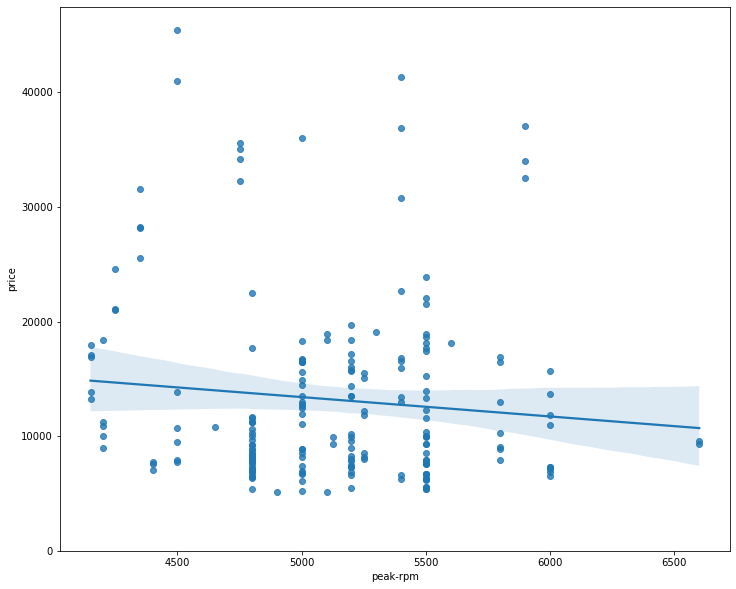

In [166]:
# peak-rpm vs price
plt.figure(figsize = (12,10))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

##### Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases

In [168]:
# determine the correlation between peak-rpm and highway-mpg vs. price
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot: a good way to visualize the variance of the data is to use a residual plot. 
#### The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).

C:\Users\QXJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


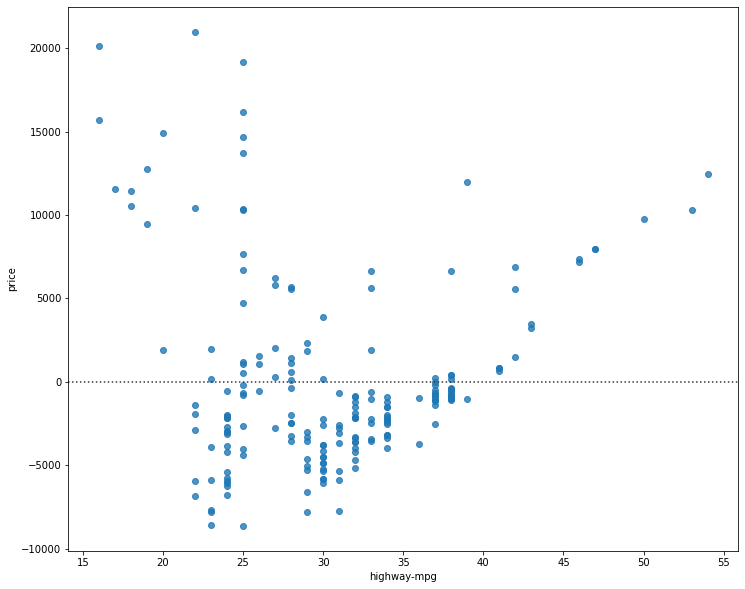

In [169]:
plt.figure(figsize=(12,10))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

#### We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

#####  A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. We look at the spread of the residuals:

#### - If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

#### Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

## Multiple linear regression
#### To visualize multiple linear regression: distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [170]:
Y_hat = lm.predict(Z)

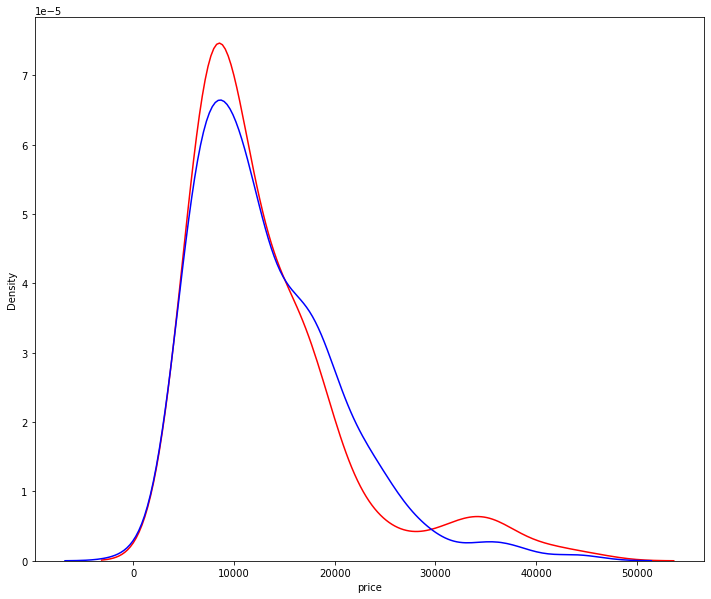

In [171]:
# Distribution plot 
plt.figure(figsize = (12,10))

ax1 = sns.kdeplot(df['price'],color = 'r', label = 'Actual value')
sns.kdeplot(yhat,  color ='b', label = 'Fitted Value', ax = ax1)
# displot doesn't not accpet double axises, using kdeplot 

ax0.set_title('Actual vs Fitted Value for Price')
ax0.set_xlabel('Price in USD')
ax0.set_ylabel('Proportoin of cars')
plt.show()

##### The fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial regression and pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [172]:
def plotpolly(model, independent_variable, dependent_variable, name):
    x_new =np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    # gca means "get current axes".
    # "Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created. If you create two subplots, the subplot that is created last is the current one.
    
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close

In [173]:
x = df['highway-mpg']
y = df['price']

In [174]:
# polynomial of the cubic
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


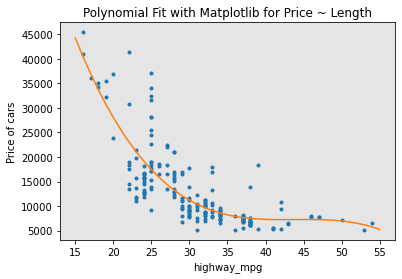

In [175]:
plotpolly(p,x,y,'highway_mpg')

In [176]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [177]:
# try 11 orders
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


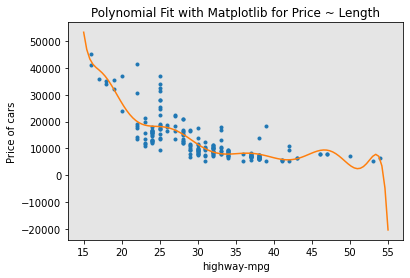

In [178]:
plotpolly(p,x,y,'highway-mpg')

In [179]:
# perform a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [181]:
#create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree =2)
pr

PolynomialFeatures()

In [182]:
Z_pr=pr.fit_transform(Z)

In [183]:
Z.shape

(201, 4)

In [184]:
Z_pr.shape

(201, 15)

## Pipeline

#### Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [186]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [187]:
#We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#### First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.Then, we can normalize the data,  perform a transform and fit the model simultaneously.

In [190]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#### Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [191]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

#### Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [192]:
Input = [('scale', StandardScaler()),('model', LinearRegression())]

In [193]:
pipe = Pipeline(Input)

In [194]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [195]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

## Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


### Model 1: Simple Linear Regression

In [197]:
#highway_mpg_fit
lm.fit(X,Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
#We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

The R-square is:  0.4965911884339175


In [199]:
# Calculate the MSE: the model with the smallest MSE value is a better fit
yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


#### We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [202]:
#Import the function <b>mean_squared_error from the module
from sklearn.metrics import mean_squared_error

In [203]:
# Compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression

In [205]:
# Calculate R^2
lm.fit(Z, df['price'])
print('The R^2 is: ', lm.score(Z,df['price']))

The R^2 is:  0.8093732522175299


#### We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [207]:
# Calculate MSE
Y_predict_multifit = lm.predict(Z)

In [211]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'],Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


### Model 3: Polynomial Fit

In [212]:
from sklearn.metrics import r2_score
# Polynomial uses another different function

In [213]:
# Calculate R^2:the model with the higher R-squared value is a better fit
r_squared = r2_score(y,p(x))
print('The R^2 value is: ', r_squared)

The R^2 value is:  0.702376908737018


#### We can say that \~67.419 % of the variation of price is explained by this polynomial fit.

In [214]:
# Calculate MSE
mean_squared_error(df['price'],p(x))

18703127.67098826

## Prediction and Decision Making

### Prediction

In [217]:
# In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. 
# create a new input
new_input = np.arange(1,100,1).reshape(-1,1)

In [218]:
# Fit the model
lm.fit(X,Y)

LinearRegression()

In [221]:
# Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

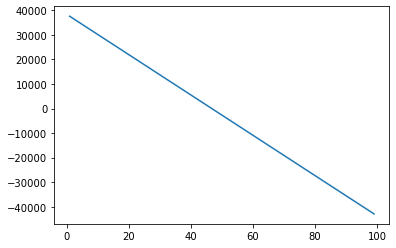

In [222]:
plt.plot(new_input,yhat)
plt.show()

### Decision Making: determing a good model fit

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
